# Visualize HVI map
- This script is used to visualize heat vulnerability index map.

In [1]:
import os
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from matplotlib.colors import ListedColormap, BoundaryNorm
home_path = '/gws/nopw/j04/duicv/yuansun/'

In [45]:
output_dir = home_path + '0_lcz_mcr/output_analysis/regional/HVI/'
df_hvi = pd.read_csv(output_dir + 'hvi_scores.csv')
gdf_gmcr = gpd.read_file(home_path + '0_lcz_mcr/output_analysis/OA_mcr/MCR_OA/greater_manchester_open_areas.shp')
# Add geometry (spatial data) for mapping
df_hvi['geometry'] = gdf_gmcr['geometry']
# Step 8: Visualize or map the HVI values (depending on your spatial data)
gdf_hvi = gpd.GeoDataFrame(df_hvi, geometry='geometry')
gdf_hvi = gdf_hvi.to_crs(epsg=4326)

In [19]:
crs = "EPSG:4326"
shapefile_path = home_path + 'dataset/Office_for_National_Statistics/county_boundary/Counties_and_Unitary_Authorities_December_2023_Boundaries_UK_BSC_4915494739307740134/CTYUA_DEC_2023_UK_BSC.shp'
gdf = gpd.read_file(shapefile_path)
gdf_platecarree = gdf.to_crs(crs)
greater_manchester_counties = ['Bolton', 'Bury', 'Manchester', 'Oldham', 'Rochdale','Salford', 'Stockport', 'Tameside', 'Trafford', 'Wigan']
gdf_greater_manchester = gdf_platecarree[gdf_platecarree['CTYUA23NM'].isin(greater_manchester_counties)]

In [35]:
output_dir = home_path + '0_lcz_mcr/output_analysis/regional/landscape/'
gdf_river = gpd.read_file(output_dir + 'river/river_mcr.shp')
gdf_road = gpd.read_file(output_dir + 'road/major_road_mcr.shp')

In [14]:
print(np.unique(gdf_river['form']))

['canal' 'inlandRiver' 'lake']


In [11]:
print(np.unique(gdf_road['RoadNumber'].str[0]))
# ‘A’:  trunk or principal roads
# 'M' motorways 

['A' 'M']


In [12]:
road_m = gdf_road[gdf_road['RoadNumber'].str.contains('M', na=False)]
road_a = gdf_road[gdf_road['RoadNumber'].str.contains('A', na=False)]
river_canal = gdf_river[gdf_river['form'] == 'canal']
river_river = gdf_river[gdf_river['form'] == 'inlandRiver']
river_lake = gdf_river[gdf_river['form'] == 'lake']
road_list = [road_m, road_a]
river_list = [river_canal, river_river, river_lake]

In [46]:
cmap = plt.cm.get_cmap('coolwarm')
#cmap = plt.cm.get_cmap('Reds')
levels = 10
cmap_discrete = cmap(np.linspace(0, 1, levels))
cmap_discrete = ListedColormap(cmap_discrete)
bounds = np.arange(1, levels + 1)
norm = BoundaryNorm(bounds, cmap_discrete.N)
proj = ccrs.PlateCarree()
extent = gdf_hvi.total_bounds
min_x, min_y, max_x, max_y = extent
print(f"Min X: {min_x}, Min Y: {min_y}, Max X: {max_x}, Max Y: {max_y}")
boundarywidth = 0.5
labelcolor = '#6b6b6b'
labelsize = 6
pad = 2
linewidth = 0.5
alpha = 0.5
sm = plt.cm.ScalarMappable(cmap=cmap_discrete, norm=norm)
sm._A = []  # Workaround for ScalarMappable without data
road_linewidth_list = [1, 0.25]
river_linewidth_list = [1, 0.25, 0]
alpha_list = [1, 1, 0.4]
title_list = ['(a) HVI map with roads', '(b) HVI map with rivers', '(c) HVI structural diagram']
left = 0.6
bottom = 0.38
width = 0.3
height = 0.1

Min X: -2.730525003405921, Min Y: 53.327320463129645, Max X: -1.9096211177964477, Max Y: 53.68573389641954


/tmp/ipykernel_2013836/3804481539.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('coolwarm')


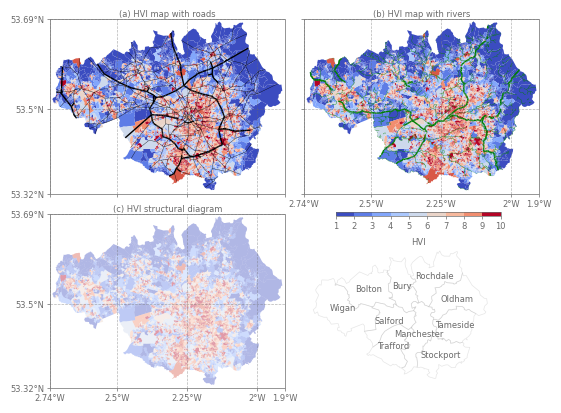

In [47]:
fig, axes = plt.subplots(2, 2, figsize=(5.5, 4), subplot_kw={'projection': proj}) 
ax = axes.flatten()
#ax[3].remove()
for i in range(3):
    gdf_hvi.plot(column='HVI_Category', cmap=cmap, ax = ax[i], linewidth = 0, edgecolor='none', alpha = alpha_list[i], legend = False)
    if i == 0:
        ax[i].tick_params(axis='y', which = 'both', left=True, right=False, labelleft=True, labelbottom=False, labelsize=labelsize, length=2, pad = pad, width = boundarywidth,colors=labelcolor)
        ax[i].tick_params(axis='x', which = 'both', bottom=True, top=False, labelleft=False, labelbottom=False, labelsize=labelsize, length=2, pad = pad, width = boundarywidth,colors=labelcolor)
        for j in range(len(road_list)):
            road_list[j].plot(ax = ax[i], color = 'black', linewidth = road_linewidth_list[j])
    elif i == 1:
        ax[i].tick_params(axis='x', which = 'both', bottom=True, top=False, labelleft=False, labelsize=labelsize, length=2, pad = pad, width = boundarywidth,colors=labelcolor)
        ax[i].tick_params(axis='y', which = 'both', left=True, right=False, labelleft=False, labelsize=labelsize, length=2, pad = pad, width = boundarywidth,colors=labelcolor)
        for j in range(len(river_list)):
            river_list[j].plot(ax = ax[i], color = 'green', linewidth = river_linewidth_list[j])        
    else:
        ax[i].tick_params(axis='both', which = 'both', left=True, right=False, labelleft=True, labelsize=labelsize, length=2, pad = pad, width = boundarywidth,colors=labelcolor)   
    ax[i].set_xlim(-2.74, -1.90)
    ax[i].set_ylim(53.32, 53.69)
    ax[i].set_xticks([-2.74, -2.5, -2.25, -2, -1.9], crs = proj)
    ax[i].set_yticks([53.32, 53.5, 53.69], crs = proj)
    ax[i].xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=False))
    ax[i].yaxis.set_major_formatter(LatitudeFormatter())
    ax[i].grid('both', linewidth=linewidth, color=labelcolor, alpha=alpha, linestyle='--')
    ax[i].set_title(title_list[i], fontsize = labelsize, color = labelcolor, pad = pad)
    for spine in ax[i].spines.values():
        spine.set_linewidth(boundarywidth)
        spine.set_edgecolor(labelcolor)

cbar = fig.colorbar(sm, ax=ax[:3], orientation='horizontal', ticks = np.arange(1, levels + 1), 
                    location='bottom', pad=0.01, extend='neither', fraction=0.05, aspect=50, shrink=0.8)
cbar.ax.tick_params(length=2,labelsize=labelsize, pad = pad, width=boundarywidth, colors=labelcolor)
cbar.outline.set_linewidth(boundarywidth)
cbar.outline.set_edgecolor(labelcolor)
cbar.ax.xaxis.label.set_color(labelcolor)
cbar.ax.set_position([left, bottom, width, height]) # [left, bottom, width, height]
cbar.set_label('HVI', fontsize=labelsize, color=labelcolor, labelpad=5)
cbar.ax.yaxis.set_label_coords(2, 0.75)

gdf_greater_manchester.plot(ax=ax[3], color='none', alpha = alpha/3, edgecolor=labelcolor, linewidth = linewidth)
for idx, row in gdf_greater_manchester.iterrows():
            ax[3].text(row.geometry.centroid.x, row.geometry.centroid.y, row['CTYUA23NM'], 
                        fontsize=labelsize, ha='center', va='center', color=labelcolor, 
                        transform=ccrs.PlateCarree())
for spine in ax[3].spines.values():
    spine.set_linewidth(0)   
ax[3].set_xlim(-2.74, -1.7)
ax[3].set_ylim(53.3, 53.825) 
ax[3].set_facecolor('none')                
#ax[3].set_position([0.5, 0.05, 0.3, 0.3]) #([left, bottom, width, height])
plt.subplots_adjust(left=0.08, right=0.97, bottom=0.04, top=0.995, wspace=0.08, hspace= 0.04)   
fig.savefig(output_dir + 'urban_landscape.png', dpi=300)  
#fig.savefig(output_dir + 'urban_landscape.pdf', dpi=600)        

# Result description

In [4]:
total_area_gmcr = gdf_gmcr[['geometry']].copy()
total_area_gmcr = total_area_gmcr.to_crs(epsg=27700)
total_area_gmcr['area'] = total_area_gmcr.area
total_area_gmcr_m = total_area_gmcr['area'].sum()
total_area_gmcr_m

np.float64(1276030798.082519)

In [5]:
gdf_hvi_10 = gdf_hvi[gdf_hvi['HVI_Category'] == 10]
gdf_hvi_10 = gdf_hvi_10.to_crs(epsg=27700)
#gdf_hvi_10['area'] = gdf_hvi_10.geometry.area
gdf_hvi_10.loc[:, 'area'] = gdf_hvi_10.geometry.area
total_area_10 = gdf_hvi_10['area'].sum()
print(int(total_area_10 / 1e6), np.round(100 * total_area_10 / total_area_gmcr_m,1) )

63 5.0


In [6]:
gdf_hvi_6_10 = gdf_hvi[gdf_hvi['HVI_Category'] >= 6]
gdf_hvi_6_10 = gdf_hvi_6_10.to_crs(epsg=27700)
#gdf_hvi_10['area'] = gdf_hvi_10.geometry.area
gdf_hvi_6_10.loc[:, 'area'] = gdf_hvi_6_10.geometry.area
total_area_6_10 = gdf_hvi_6_10['area'].sum()
print(int(total_area_6_10 / 1e6), np.round(100 * total_area_6_10 / total_area_gmcr_m,1) )

369 29.0
